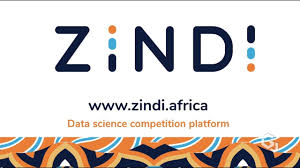

In [283]:
from IPython.display import Image
Image(r'C:/Users/USER/Downloads/zindi_africa.jpg')


# Introduction

 Based on a study conducted in 2015,by the Busara Center in rural Siaya County, near Lake Victoria in western Kenya. The survey includes more than 70 features, including information about household composition, 
economic activity, financial flows and health. In addition, study participants were asked to complete a depression screening tool. According to these datasets we have 1143 patients to whom are supposed to predict who has depression making it a classification problem. precisely a binary classification problem

# Problem Statement 

Complete the analysis of what sorts of people are likely to have depression. Apply the tools of machine learning to predict the number of people likely to get depression. 

# Import Dataset

In [284]:
%matplotlib inline
## for data manipulation import pandas and numpys
import pandas as pd
import numpy as np

##for data visualizations and distributions import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

We will start by reading the two files using pandas.

In [285]:

train_df=pd.read_csv(r'C:/Users/USER/Python/datasets/Busara/train.csv', sep=',')

test_df=pd.read_csv(r'C:\Users\USER\Python\datasets\Busara\test.csv', sep=',')
variables=pd.read_csv(r'C:\Users\USER\Python\datasets\Busara\Variable_explanations.csv', sep=',')

# Exploratory Data Analysis

In [286]:
train_df.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [287]:
test_df.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,901,181,14-Nov-61,1,21,0,3,4,10,3,...,0,0.0,0,0.0,0.0,1,0.000000,0,0.0,3
1,498,47,18-Sep-61,1,44,1,6,8,6,6,...,0,0.0,0,0.0,0.0,0,0.000000,0,0.0,2
2,710,8,03-Sep-61,1,23,1,1,3,7,1,...,0,0.0,0,0.0,0.0,1,0.080077,0,0.0,1
3,433,25,01-Nov-60,1,67,0,0,1,1,0,...,0,0.0,0,0.0,0.0,0,0.000000,1,1.0,3
4,44,2,18-May-60,1,40,1,4,6,7,4,...,0,0.0,0,0.0,0.0,0,0.000000,1,NaN,4


In [288]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143

In [289]:
train_df.count()

surveyid                   1143
village                    1143
survey_date                1143
femaleres                  1143
age                        1143
married                    1143
children                   1143
hhsize                     1143
edu                        1143
hh_children                1143
hh_totalmembers             809
cons_nondurable            1143
asset_livestock            1143
asset_durable              1143
asset_phone                1143
asset_savings              1143
asset_land_owned_total     1143
asset_niceroof             1143
cons_allfood               1143
cons_ownfood               1143
cons_alcohol               1100
cons_tobacco               1123
cons_med_total             1143
cons_med_children           724
cons_ed                    1143
cons_social                1143
cons_other                 1143
ent_wagelabor              1143
ent_ownfarm                1143
ent_business               1143
                           ... 
med_expe

In [290]:
train_df.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [291]:
train_df.dtypes

surveyid                     int64
village                      int64
survey_date                 object
femaleres                    int64
age                        float64
married                      int64
children                     int64
hhsize                       int64
edu                          int64
hh_children                  int64
hh_totalmembers            float64
cons_nondurable            float64
asset_livestock            float64
asset_durable              float64
asset_phone                float64
asset_savings              float64
asset_land_owned_total     float64
asset_niceroof               int64
cons_allfood               float64
cons_ownfood               float64
cons_alcohol               float64
cons_tobacco               float64
cons_med_total             float64
cons_med_children          float64
cons_ed                    float64
cons_social                float64
cons_other                 float64
ent_wagelabor                int64
ent_ownfarm         

In [292]:
test_df.count()

surveyid                   286
village                    286
survey_date                286
femaleres                  286
age                        285
married                    286
children                   286
hhsize                     286
edu                        286
hh_children                286
hh_totalmembers            196
cons_nondurable            286
asset_livestock            286
asset_durable              286
asset_phone                286
asset_savings              286
asset_land_owned_total     286
asset_niceroof             286
cons_allfood               286
cons_ownfood               286
cons_alcohol               274
cons_tobacco               279
cons_med_total             286
cons_med_children          176
cons_ed                    286
cons_social                286
cons_other                 286
ent_wagelabor              286
ent_ownfarm                286
ent_business               286
                          ... 
med_expenses_hh_ep         110
med_expe

In [293]:
train_df['depressed'].mean()

0.16885389326334208

In [294]:
train_df.groupby('depressed').mean()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,day_of_week
depressed,,,,,,,,,,,,,,,,,,,,,
0,719.656842,75.931579,0.917895,33.917158,0.787368,2.849474,4.864211,8.893684,2.011579,4.842878,...,36.588311,0.016842,0.551266,0.067368,3.503151,2.951886,0.191579,2.488165,0.097895,3.310526
1,697.569948,78.761658,0.911917,37.589637,0.699482,2.911917,4.896373,7.958549,2.051813,5.242188,...,24.005993,0.010363,0.564272,0.062176,3.866924,3.302651,0.176166,1.190780,0.098446,3.222798


# Check for Nan

In [295]:
train_df.isnull().any()

surveyid                   False
village                    False
survey_date                False
femaleres                  False
age                        False
married                    False
children                   False
hhsize                     False
edu                        False
hh_children                False
hh_totalmembers             True
cons_nondurable            False
asset_livestock            False
asset_durable              False
asset_phone                False
asset_savings              False
asset_land_owned_total     False
asset_niceroof             False
cons_allfood               False
cons_ownfood               False
cons_alcohol                True
cons_tobacco                True
cons_med_total             False
cons_med_children           True
cons_ed                    False
cons_social                False
cons_other                 False
ent_wagelabor              False
ent_ownfarm                False
ent_business               False
          

# Lets quantify the missing values

In [296]:
train_df.isnull().sum()

surveyid                      0
village                       0
survey_date                   0
femaleres                     0
age                           0
married                       0
children                      0
hhsize                        0
edu                           0
hh_children                   0
hh_totalmembers             334
cons_nondurable               0
asset_livestock               0
asset_durable                 0
asset_phone                   0
asset_savings                 0
asset_land_owned_total        0
asset_niceroof                0
cons_allfood                  0
cons_ownfood                  0
cons_alcohol                 43
cons_tobacco                 20
cons_med_total                0
cons_med_children           419
cons_ed                       0
cons_social                   0
cons_other                    0
ent_wagelabor                 0
ent_ownfarm                   0
ent_business                  0
                           ... 
med_expe

# Drop Nan

# Drop columns

In [297]:
array = []
for x in train_df:
    empty = train_df[x].isnull().sum()
    if ((empty/1143)* 100) >= 5:
        array.append(x)
train_df = train_df.drop(columns = array)

In [298]:
train_df.isnull().any()

surveyid                  False
village                   False
survey_date               False
femaleres                 False
age                       False
married                   False
children                  False
hhsize                    False
edu                       False
hh_children               False
cons_nondurable           False
asset_livestock           False
asset_durable             False
asset_phone               False
asset_savings             False
asset_land_owned_total    False
asset_niceroof            False
cons_allfood              False
cons_ownfood              False
cons_alcohol               True
cons_tobacco               True
cons_med_total            False
cons_ed                   False
cons_social               False
cons_other                False
ent_wagelabor             False
ent_ownfarm               False
ent_business              False
ent_nonagbusiness         False
ent_employees             False
ent_nonag_revenue         False
ent_nona

In [299]:
train_df.isnull().sum()

surveyid                   0
village                    0
survey_date                0
femaleres                  0
age                        0
married                    0
children                   0
hhsize                     0
edu                        0
hh_children                0
cons_nondurable            0
asset_livestock            0
asset_durable              0
asset_phone                0
asset_savings              0
asset_land_owned_total     0
asset_niceroof             0
cons_allfood               0
cons_ownfood               0
cons_alcohol              43
cons_tobacco              20
cons_med_total             0
cons_ed                    0
cons_social                0
cons_other                 0
ent_wagelabor              0
ent_ownfarm                0
ent_business               0
ent_nonagbusiness          0
ent_employees              0
ent_nonag_revenue          0
ent_nonag_flowcost         0
ent_farmrevenue            0
ent_farmexpenses           0
ent_animalstoc

In [300]:
train_df.fillna(0,inplace=True)


In [301]:
train_df.shape

(1143, 54)

# Test dataframe null

In [302]:
test_df.isnull().any()

surveyid                   False
village                    False
survey_date                False
femaleres                  False
age                         True
married                    False
children                   False
hhsize                     False
edu                        False
hh_children                False
hh_totalmembers             True
cons_nondurable            False
asset_livestock            False
asset_durable              False
asset_phone                False
asset_savings              False
asset_land_owned_total     False
asset_niceroof             False
cons_allfood               False
cons_ownfood               False
cons_alcohol                True
cons_tobacco                True
cons_med_total             False
cons_med_children           True
cons_ed                    False
cons_social                False
cons_other                 False
ent_wagelabor              False
ent_ownfarm                False
ent_business               False
          

In [303]:
array = []
for x in test_df:
    empty = test_df[x].isnull().sum()
    if ((empty/1143)* 100) >= 5:
        array.append(x)
test_df = test_df.drop(columns = array)

In [304]:
test_df.isnull().sum()

surveyid                   0
village                    0
survey_date                0
femaleres                  0
age                        1
married                    0
children                   0
hhsize                     0
edu                        0
hh_children                0
cons_nondurable            0
asset_livestock            0
asset_durable              0
asset_phone                0
asset_savings              0
asset_land_owned_total     0
asset_niceroof             0
cons_allfood               0
cons_ownfood               0
cons_alcohol              12
cons_tobacco               7
cons_med_total             0
cons_ed                    0
cons_social                0
cons_other                 0
ent_wagelabor              0
ent_ownfarm                0
ent_business               0
ent_nonagbusiness          0
ent_employees              0
ent_nonag_revenue          0
ent_nonag_flowcost         0
ent_farmrevenue            0
ent_farmexpenses           0
ent_animalstoc

In [305]:
#Age is a column name for our train data
test_df['age']=test_df['age'].fillna(-0.5)

In [306]:
test_df.fillna(0,inplace=True)

In [307]:
test_df=test_df.drop(columns=['day_of_week'])
train_df=train_df.drop(columns=['day_of_week'])

In [308]:
test_df=test_df.drop(columns=['survey_date'])
train_df=train_df.drop(columns=['survey_date'])

In [327]:
test_df=test_df.drop(columns=['age'])
train_df=train_df.drop(columns=['age'])

In [328]:
test_df.shape

(286, 50)

# Feature Engineering 

 check the feature importance in 3 ways
 *correlation heat map,
 *feature importance,
 *highest levels of missing values.

In [199]:
train_df.corr()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
surveyid,1.000000,0.662797,0.025247,0.041632,-0.015671,0.031325,0.027476,-0.039734,-0.000358,0.009463,...,0.045888,0.040764,-0.021107,0.000453,-0.009799,0.072213,0.020514,-0.073316,-0.019913,0.007106
village,0.662797,1.000000,-0.008408,0.001868,0.022867,0.039394,0.034232,-0.009572,-0.041124,-0.031669,...,0.027330,0.006922,-0.039510,0.008756,0.006716,0.063153,0.001042,-0.069818,0.015881,-0.028304
femaleres,0.025247,-0.008408,1.000000,-0.137133,0.275119,0.224375,0.256443,-0.075308,0.197696,0.075143,...,0.012628,0.018648,-0.034134,-0.034100,-0.037609,0.007713,-0.008594,0.003292,-0.008112,0.003938
age,0.041632,0.001868,-0.137133,1.000000,-0.400452,-0.111424,-0.068531,-0.393277,-0.070510,-0.028535,...,-0.026741,-0.025685,0.046239,0.016848,0.022718,-0.095900,-0.018136,-0.063066,0.100159,0.028122
married,-0.015671,0.022867,0.275119,-0.400452,1.000000,0.220000,0.322867,0.197570,0.152999,0.152086,...,0.051875,0.041664,-0.022720,0.007061,-0.003645,0.070017,0.034929,0.003347,-0.078541,-0.057146
children,0.031325,0.039394,0.224375,-0.111424,0.220000,1.000000,0.934689,0.161839,0.635439,0.087106,...,0.036236,-0.005465,0.014530,-0.003435,-0.001945,0.035391,-0.004842,-0.024424,0.012671,0.015846
hhsize,0.027476,0.034232,0.256443,-0.068531,0.322867,0.934689,1.000000,0.131502,0.616917,0.143179,...,0.024341,-0.005552,0.014748,0.003540,0.004812,0.035991,-0.016109,-0.029693,0.005681,-0.001700
edu,-0.039734,-0.009572,-0.075308,-0.393277,0.197570,0.161839,0.131502,1.000000,0.088674,0.068829,...,0.082769,0.012163,0.096897,0.024821,0.020912,0.080371,0.039023,0.042708,-0.122236,-0.001032
hh_children,-0.000358,-0.041124,0.197696,-0.070510,0.152999,0.635439,0.616917,0.088674,1.000000,0.462452,...,0.026736,0.016797,0.039377,0.043708,0.037985,0.017773,0.014934,0.115244,0.007477,-0.020670
cons_nondurable,0.009463,-0.031669,0.075143,-0.028535,0.152086,0.087106,0.143179,0.068829,0.462452,1.000000,...,0.006400,0.046471,0.005752,0.010446,-0.001583,-0.014804,0.002273,0.132473,-0.020808,-0.056767



X = train_df.iloc[:,0:20]  #independent columns
y = train_df.iloc[:,-1]    #target column i.e depression
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,12))
#plot heat map
sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


# Distributions

## Boxplots

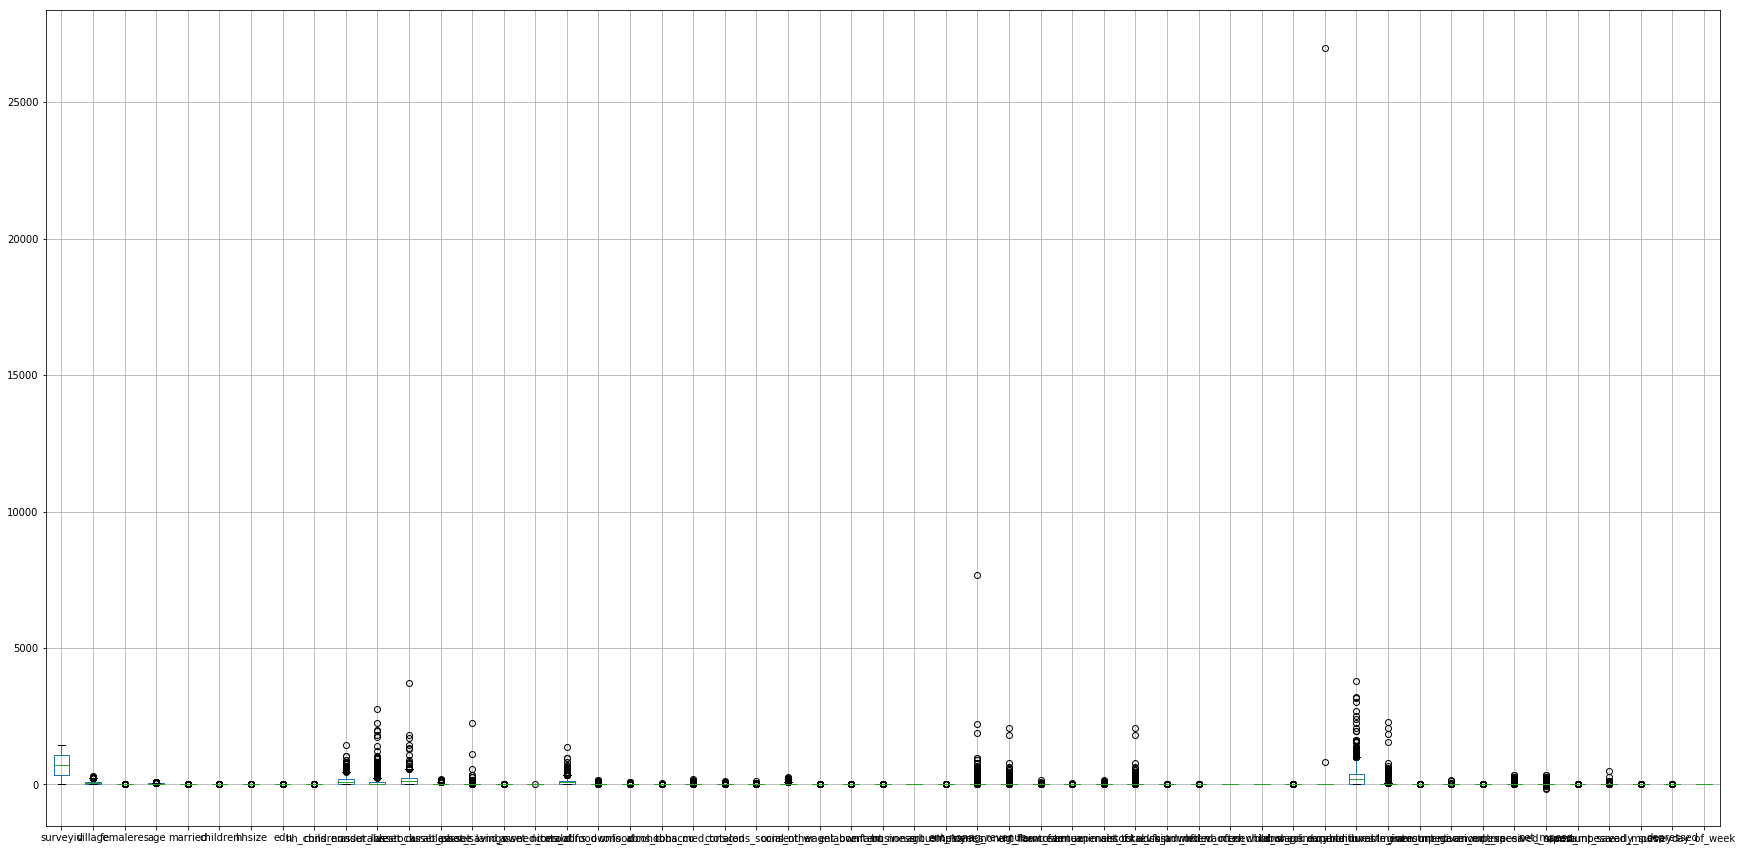

In [215]:
train_df.boxplot(figsize=(30,15))

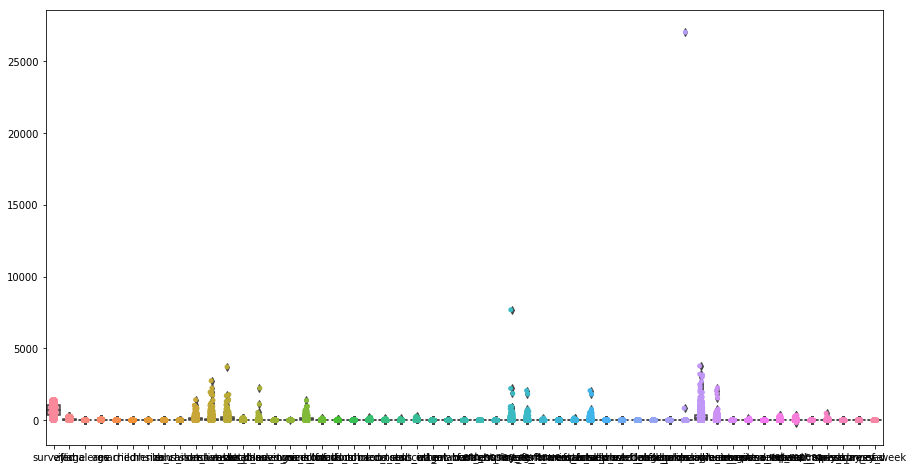

In [219]:
##sns.set(font_scale=1.5, rc={'figure.figsize':(15, 8)})
sns.boxplot(data=train_df[20:])

sns.stripplot(data=train_df, jitter=True, edgecolor="gray")
plt.rcParams['figure.figsize'] = (15, 8)

c:\users\user\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\user\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


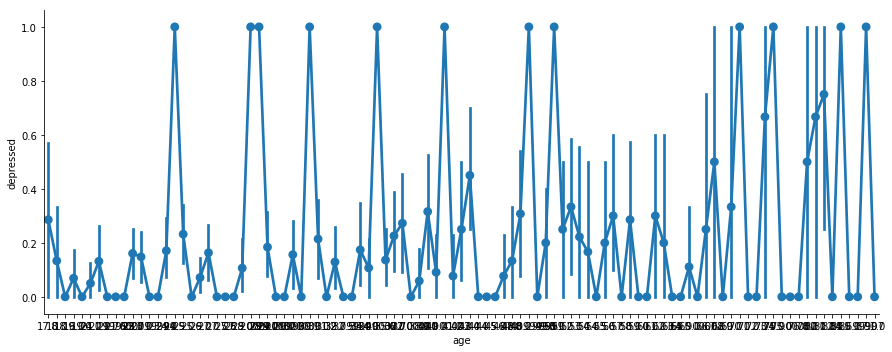

In [205]:
axes = sns.factorplot('age','depressed', 
                      data=train_df, aspect = 2.5, )

# split Dataset

In [329]:
train_df.keys()

Index(['surveyid', 'village', 'femaleres', 'married', 'children', 'hhsize',
       'edu', 'hh_children', 'cons_nondurable', 'asset_livestock',
       'asset_durable', 'asset_phone', 'asset_savings',
       'asset_land_owned_total', 'asset_niceroof', 'cons_allfood',
       'cons_ownfood', 'cons_alcohol', 'cons_tobacco', 'cons_med_total',
       'cons_ed', 'cons_social', 'cons_other', 'ent_wagelabor', 'ent_ownfarm',
       'ent_business', 'ent_nonagbusiness', 'ent_employees',
       'ent_nonag_revenue', 'ent_nonag_flowcost', 'ent_farmrevenue',
       'ent_farmexpenses', 'ent_animalstockrev', 'ent_total_cost',
       'fs_adskipm_often', 'fs_adwholed_often', 'med_vacc_newborns',
       'med_child_check', 'labor_primary', 'wage_expenditures',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'early_survey',
       'depressed'],
      dtype='obje

In [330]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

columns = ['village', 'femaleres', 'married', 'children',
       'hhsize', 'edu', 'hh_children', 'cons_nondurable', 'asset_livestock',
       'asset_durable', 'asset_phone', 'asset_savings',
       'asset_land_owned_total', 'asset_niceroof', 'cons_allfood',
       'cons_ownfood', 'cons_alcohol', 'cons_tobacco', 'cons_med_total',
       'cons_ed', 'cons_social', 'cons_other', 'ent_wagelabor', 'ent_ownfarm',
       'ent_business', 'ent_nonagbusiness', 'ent_employees',
       'ent_nonag_revenue', 'ent_nonag_flowcost', 'ent_farmrevenue',
       'ent_farmexpenses', 'ent_animalstockrev', 'ent_total_cost',
       'fs_adskipm_often', 'fs_adwholed_often', 'med_vacc_newborns',
       'med_child_check', 'labor_primary', 'wage_expenditures',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'early_survey']

holdout = test_df # from now on we will refer to this
               # dataframe as the holdout data
X = train_df[columns]
y = train_df['depressed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)



# Logistic Regression

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score #work

In [332]:
# Logistic Regression : 
model = LogisticRegression() ##logistic regression object
 
model.fit(X_train, y_train) ##fit and train the model

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [333]:
model.score(X_train, y_train)

0.8293216630196937

In [334]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.834061135371179


In [338]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.79824561 0.8        0.81578947 0.8173913  0.8173913  0.8245614
 0.8245614  0.83333333 0.83333333 0.83333333]
0.8197940503432495


In [339]:
model = LogisticRegression()
model.fit(X, y)
holdout_predictions = model.predict(holdout[columns])

In [341]:
holdout_ids = holdout["surveyid"]
submission_df = {"surveyid": holdout_ids,
                 "depressed": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission10.csv",index=False)

In [342]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.79824561 0.8        0.81578947 0.8173913  0.8173913  0.8245614
 0.8245614  0.83333333 0.83333333 0.83333333]
0.8197940503432495


In [343]:
holdout_ids = holdout["surveyid"]
submission_df = {"surveyid": holdout_ids,
                 "depressed": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission11.csv",index=False)

# Naives Bayes

In [357]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(X_train, y_train)

#Print performance
print('The accuracy of the Naives Bayes on training data is {:.2f}'.format(gn.score(X_train, y_train)))
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print (accuracy)

The accuracy of the Naives Bayes on training data is 0.25
0.7117903930131004
